# Gaussian Distribution

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

seed = 1
np.random.seed(seed)

# 1D Gaussian

In [5]:
def gaussian_pdf_1d(x, mean, variance):
    return np.exp(-np.square(x - mean) / (2 * variance)) / (np.sqrt(2 * np.pi * variance))

def visualize_gaussian_1d(x, ys, means, variances):
    """ This visualize the 2D curves """
    fig = figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

    for y, mean, variance in zip(ys, means, variances):
        plt.plot(x, y, label="Mean: {} - Variance: {}".format(mean, variance))
    plt.legend()
    plt.show()

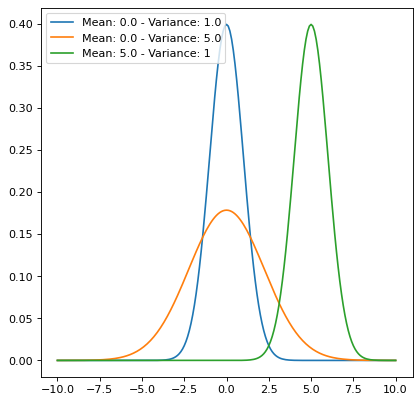

In [6]:
means = [0., 0., 5.]
variances = [1., 5., 1]

x = np.arange(-10, 10.1, 0.1)
ys = [gaussian_pdf_1d(x, mean, variance) for (mean, variance) in zip(means, variances)]

visualize_gaussian_1d(x, ys, means, variances)

## 2D Gaussian

In [9]:
def gaussian_pdf_nd(x, mean, covariance):
    return (np.exp(-0.5 * (x - mean)[:, None, :] @ np.linalg.inv(covariance) @ (x - mean)[:, :, None] ) / (np.sqrt(((2 * np.pi) ** mean.size) * np.linalg.det(covariance)))).flatten()

def visualize_gaussian_3d(x, ys, means, covariances, grid_shape):
    """ This visualize the 3D curves """

    fig = figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    x_1 = x[:, 0].reshape(grid_shape)
    x_2 = x[:, 1].reshape(grid_shape)

    for y, mean, covariance in zip(ys, means, covariances):
        ax.plot_surface(x_1, x_2, y.reshape(grid_shape), alpha=1, label="Mean: {} - covariance: {}".format(mean, covariance))

    plt.show()

def plot_contour(x, y, grid_shape):
    fig = figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    x_1 = x[:, 0].reshape(grid_shape)
    x_2 = x[:, 1].reshape(grid_shape)

    ax.contourf(x_1, x_2, y.reshape(grid_shape))
    plt.show()

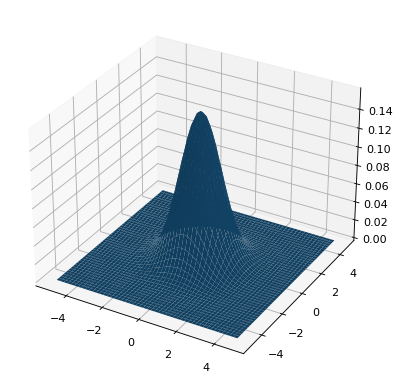

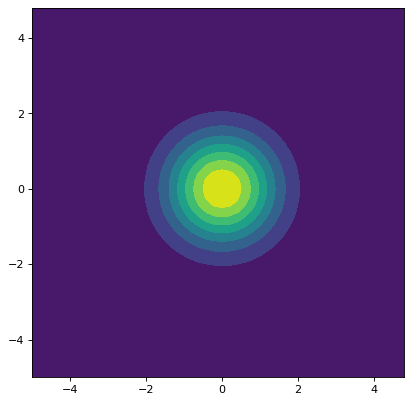

In [10]:
mean = np.zeros((2))

# Isotropic
covariance = np.eye(2)

x = np.mgrid[-5:5:0.2, -5:5:0.2]
grid_shape = x.shape[1:]
x = x.reshape((2, -1)).T

ys = gaussian_pdf_nd(x, mean, covariance)

visualize_gaussian_3d(x, [ys], [mean], [covariance], grid_shape)
plot_contour(x, ys, grid_shape)

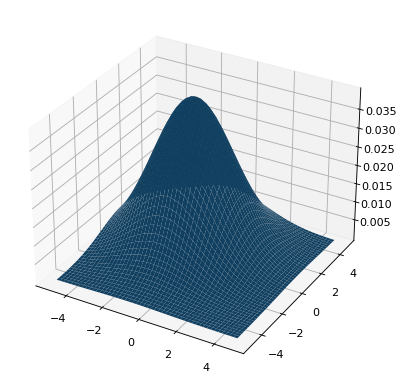

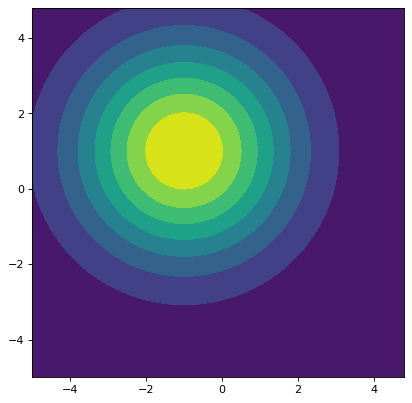

In [11]:
# We can shift the Gaussian and its spread by changing the mean and covariance respectively
mean = np.array([-1., 1.])
covariance = np.eye(2) * 4

ys = gaussian_pdf_nd(x, mean, covariance)

visualize_gaussian_3d(x, [ys], [mean], [covariance], grid_shape)
plot_contour(x, ys, grid_shape)

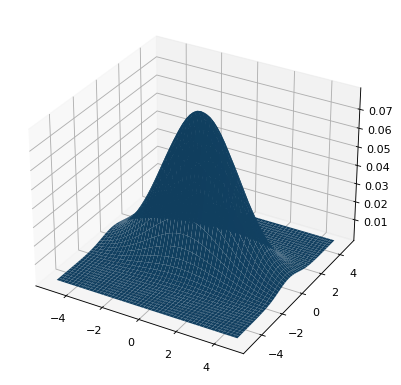

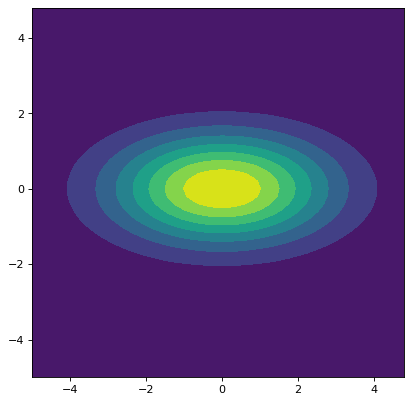

In [12]:
# The diagonals of the covariance dictates the stretch in its direction
mean = np.zeros(2)
covariance = np.eye(2)
covariance[0, 0] = 4

ys = gaussian_pdf_nd(x, mean, covariance)

visualize_gaussian_3d(x, [ys], [mean], [covariance], grid_shape)
plot_contour(x, ys, grid_shape)

<ipython-input-13-dbdcaf2a1f76>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [1, 1]], dtype=np.float)


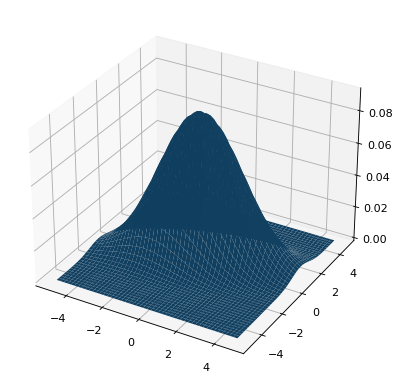

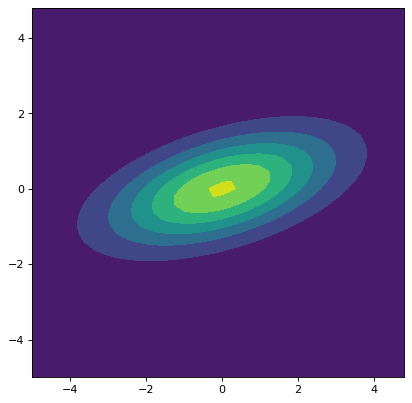

In [13]:
# The non-diagonal represents the covariance between directions
mean = np.zeros(2)
covariance = np.array([[4, 1],
                       [1, 1]], dtype=np.float)

ys = gaussian_pdf_nd(x, mean, covariance)

visualize_gaussian_3d(x, [ys], [mean], [covariance], grid_shape)
plot_contour(x, ys, grid_shape)

## Marginals

<IPython.core.display.Javascript object>


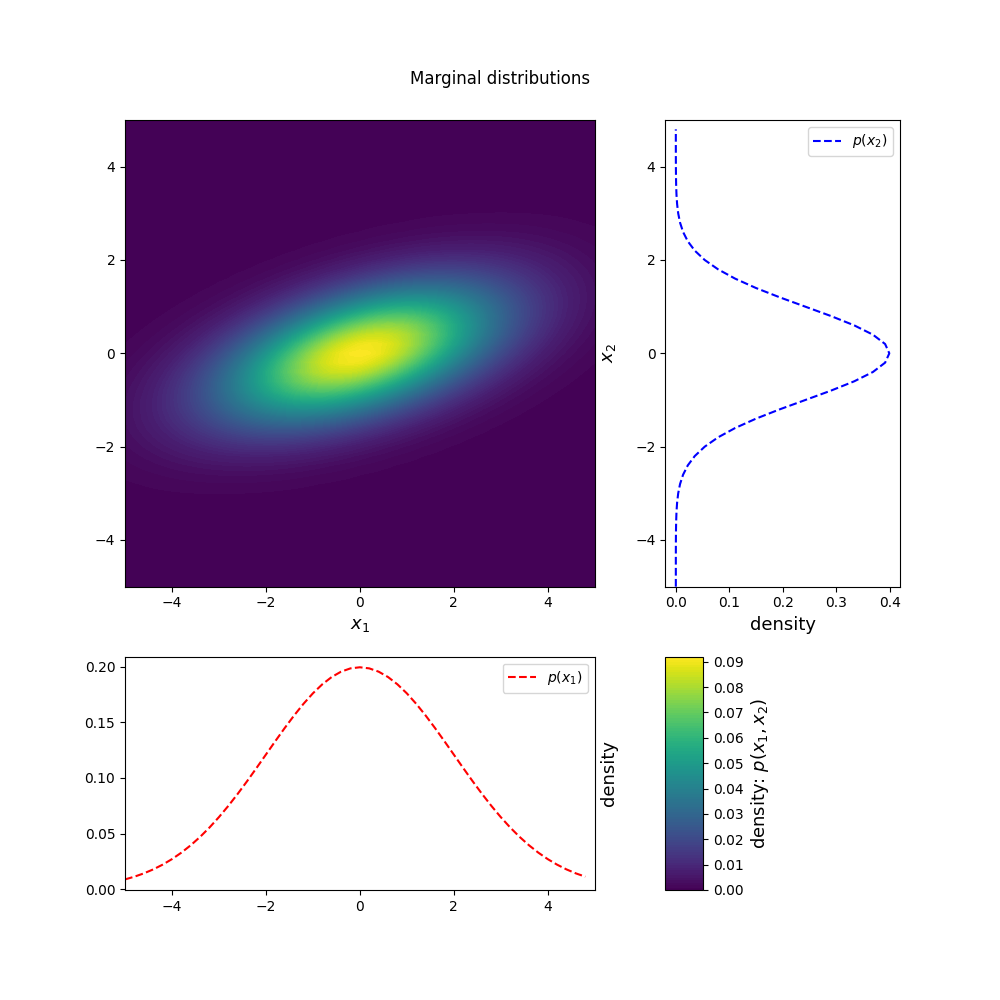

In [ ]:
# Define 2D Gaussian
mean = np.zeros(2)
covariance = np.array([[4, 1],
                       [1, 1]], dtype=np.float)

x = np.mgrid[-5:5.2:0.2, -5:5.2:0.2]
grid_shape = x.shape[1:]
x = x.reshape((2, -1)).T

ys = gaussian_pdf_nd(x, mean, covariance)


# Marginals x1 and x2, respectively
marg_means = [mean[0], mean[1]]
marg_variances = [covariance[0, 0], covariance[1, 1]]

marg_x = np.arange(-5, 5, 0.2)
marg_ys = [gaussian_pdf_1d(marg_x, mean, variance) for (mean, variance) in zip(marg_means, marg_variances)]


# PLOTTING ============================================================
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
plt.suptitle('Marginal distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
# Plot bivariate distribution
con = ax1.contourf(x[:, 0].reshape(grid_shape), x[:, 1].reshape(grid_shape), ys.reshape(grid_shape), 100)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-5, 5, -5, 5])

# # Plot y
ax2 = plt.subplot(gs[1])
# Plot univariate distribution
ax2.plot(marg_ys[1], marg_x, 'b--', label=f'$p(x_2)$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-5, 5)

# # Plot x
ax3 = plt.subplot(gs[2])
# Plot univariate distribution
ax3.plot(marg_x, marg_ys[0], 'r--', label=f'$p(x_1)$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-5, 5)

# # Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x_1, x_2)$', fontsize=13)
plt.show()


## Conditionals

<ipython-input-18-3aed0f446527>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [1, 1]], dtype=np.float)


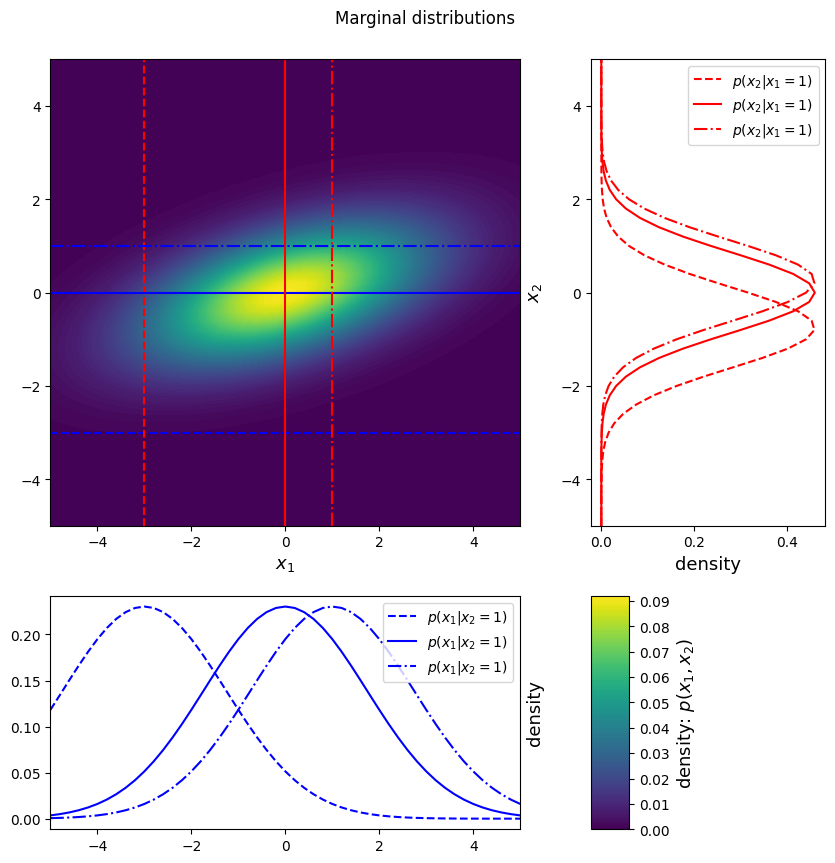

In [18]:
# Define 2D Gaussian
mean = np.zeros(2)
covariance = np.array([[4, 1],
                       [1, 1]], dtype=np.float)
precision = np.linalg.inv(covariance)

x = np.mgrid[-5:5.2:0.2, -5:5.2:0.2]
grid_shape = x.shape[1:]
x = x.reshape((2, -1)).T

ys = gaussian_pdf_nd(x, mean, covariance)

# Compute conditional Gaussian on x_2 = -3, 0, 1
fixed_values = [-3, 0, 1]
conditional_means = []
conditional_variances = []
for x_2 in fixed_values:
    conditional_variances.append(precision[0, 0] ** (-1))
    conditional_means.append(mean[0] - (conditional_variances[-1] * precision[0, 1] * (x_2 - mean[1])))

cond_x = np.arange(-5, 5.2, 0.2)
cond_x_2_ys = [gaussian_pdf_1d(cond_x, mean, variance) for (mean, variance) in zip(conditional_means, conditional_variances)]


# Compute conditional Gaussian on x_1 = -3, 0, 1
conditional_means = []
conditional_variances = []
for x_1 in fixed_values:
    conditional_variances.append(precision[1, 1] ** (-1))
    conditional_means.append(mean[1] - (conditional_variances[-1] * precision[0, 1] * (x_1 - mean[0])))

cond_x = np.arange(-5, 5.2, 0.2)
cond_x_1_ys = [gaussian_pdf_1d(cond_x, mean, variance) for (mean, variance) in zip(conditional_means, conditional_variances)]


# PLOTTING ============================================================
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
plt.suptitle('Marginal distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
# Plot bivariate distribution
con = ax1.contourf(x[:, 0].reshape(grid_shape), x[:, 1].reshape(grid_shape), ys.reshape(grid_shape), 100)

line_type = ['--', '-', '-.']
for idx, x_2 in enumerate(fixed_values):
    ax1.plot([-5, 5], [x_2, x_2], "b{}".format(line_type[idx]))
    ax1.plot([x_2, x_2], [-5, 5], "r{}".format(line_type[idx]))
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-5, 5, -5, 5])

# # Plot y
ax2 = plt.subplot(gs[1])
# Plot univariate distribution
for idx, (cond_x_1_y, x_1) in enumerate(zip(cond_x_1_ys, fixed_values)):
    ax2.plot(cond_x_1_y, cond_x, "r{}".format(line_type[idx]), label=f'$p(x_2 | x_1={x_2})$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-5, 5)

# # Plot x
ax3 = plt.subplot(gs[2])
# Plot univariate distribution
for idx, (cond_x_2_y, x_2) in enumerate(zip(cond_x_2_ys, fixed_values)):
    ax3.plot(cond_x, cond_x_2_y, "b{}".format(line_type[idx]), label=f'$p(x_1 | x_2={x_1})$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-5, 5)

# # Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x_1, x_2)$', fontsize=13)
plt.show()

## Reference
https://peterroelants.github.io/posts/multivariate-normal-primer/